<a href="https://colab.research.google.com/github/JasserHedhli/clustering/blob/main/CAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
df = pd.read_csv("/content/dataset-90380.csv")
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [ ]:
df.corr()

,Murder,Assault,UrbanPop,Rape,label
Murder,1.000000,0.801873,0.069573,0.563579,0.433965
Assault,0.801873,1.000000,0.258872,0.665241,0.505016
UrbanPop,0.069573,0.258872,1.000000,0.411341,0.320330
Rape,0.563579,0.665241,0.411341,1.000000,0.421410
label,0.433965,0.505016,0.320330,0.421410,1.000000


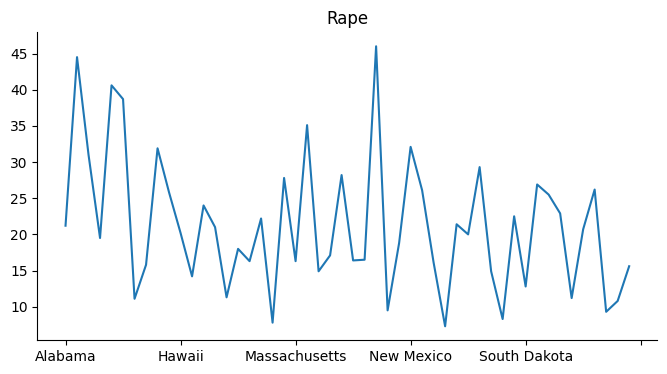

In [ ]:
# @title Rape

from matplotlib import pyplot as plt
df['Rape'].plot(kind='line', figsize=(8, 4), title='Rape')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [ ]:
X = df.values
X

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

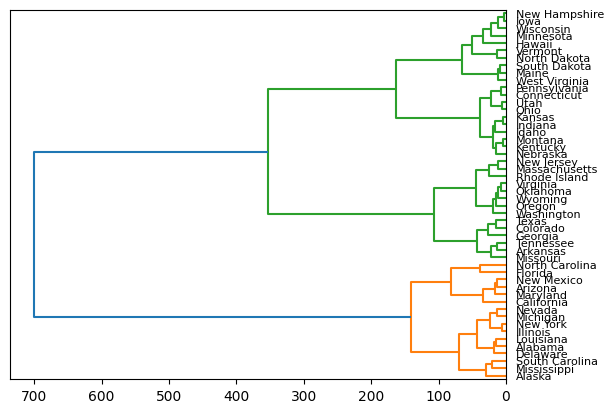

In [ ]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'), labels = df.index, orientation='left')

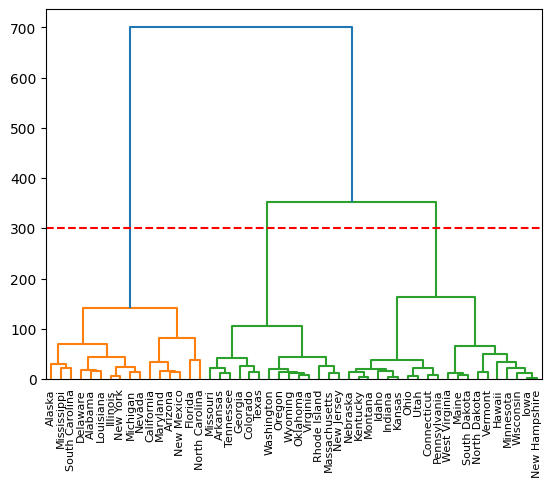

In [ ]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'), labels = df.index)
plt.axhline(y=300, color='red', linestyle='--')

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters = 3)

In [ ]:
agg_clustering.fit(df)

AgglomerativeClustering(n_clusters=3)

In [ ]:
df['label'] = agg_clustering.labels_
df.head()

,Murder,Assault,UrbanPop,Rape,label
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [ ]:
df['label'].value_counts()

0    20
1    16
2    14
Name: label, dtype: int64

In [ ]:
df['label'].value_counts(normalize=True) * 100

0    40.0
1    32.0
2    28.0
Name: label, dtype: float64

In [ ]:
df.groupby(df.label).mean()

,Murder,Assault,UrbanPop,Rape
label,,,,
0,4.270000,87.550000,59.750000,14.390000
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857


In [ ]:
for i in range(3):
  print(f'Cluster {i}')
  print(df[df.label==i].index.tolist())
  print()

Cluster 0
['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']

Cluster 1
['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']

Cluster 2
['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']



* Cluster 0 generally appears to have the lowest crime rates across all variables.
* Cluster 1 consistently exhibits the highest crime rates across Murder, Assault, and Rape.
* Cluster 2 falls between Cluster 0 and Cluster 1 in terms of crime rates, showing higher rates than Cluster 0 but lower rates than Cluster 1.